In [4]:
from PIL import Image
from tensorflow.keras.datasets import cifar10
import seaborn as sns
from tensorflow.keras.utils import to_categorical
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.math import confusion_matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import glob,os

In [9]:

v = 3
def hi():
    # other code...
    hi.layer_1 = []
    l = [0,1,2,3,4]
    for i in l:
        
        hi.bye = 4*l[i] # Create function attribute.
        hi.layer_1.append(hi.bye)

        sigh = 10

hi()
a = hi.bye
print(hi.layer_1)

[0, 4, 8, 12, 16]


In [5]:

def load_dataset():
    #load datset
    (x_train, y_train), (x_test, y_test)=cifar10.load_data()
    instances = []
    # Load in the images
    for filepath in os.listdir(r'C:\Users\sadma\Lab2\converted-agumented'):  
        image=( Image.open(r'C:/Users/sadma/Lab2/converted-agumented/'+filepath))
        data=np.asarray(image)
        if data.shape!=(32,32,3): 
            print(filepath)
            continue
        instances.append(data)
    bobcats=np.stack(instances, axis=0)    
    bobcat_group=np.arange(6000).reshape(6000,1); 
    bobcat_group.fill(10)    
    x_train=np.concatenate((x_train,bobcats[:5000,:,:,:]),axis=0)
    x_test=np.concatenate((x_test,bobcats[5000:,:,:,:]),axis=0)
    y_train=np.concatenate((y_train,bobcat_group[:5000]),axis=0)
    y_test=np.concatenate((y_test,bobcat_group[5000:]),axis=0)
    # Normalizing
    x_train=x_train/255
    x_test=x_test/255
    #One hot encoding
    y_train_cat=to_categorical(y_train,11)
    y_test_cat=to_categorical(y_test,11)
    return x_train, x_test, y_train_cat, y_test_cat, y_test



print(y_train_cat.shape)
print(y_test_cat.shape)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

    
    

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(11, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    define_model.saved_mod = model.save('C:/Users/sadma/Lab2/model.h5')  #do i have to save the model everytime?
    return model


def plot_(history):
    pd.DataFrame(history.history).plot()
    


def run_test():
    #load data
    x_train, x_test, y_train_cat, y_test_cat, y_test = load_dataset()
    # define model
    model= define_model()  # another fucntion for the looped new mdoels 
    
    #fit 
    history=model.fit(x_train,y_train_cat,epochs=10,validation_data=(x_test,y_test_cat))
    
    #plot
    plot_(history)
    
    #eval score
    evaluation = model.evaluate(x_test, y_test_cat)
    print('Test Accuracy: {}'.format(evaluation[1]))
    
    #confusion matrix
    p_test = model.predict(x_test).argmax(axis=1)
    cm = confusion_matrix(y_test, p_test)
    plt.figure(figsize=(15,15))
    plot_confusion_matrix(cm , ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck','bobcat'],normalize=True)





run_test()

(6000, 32, 32, 3)
(6000, 1)
Shape of x_train is (55000, 32, 32, 3)
Shape of x_test is (11000, 32, 32, 3)
Shape of y_train is (55000, 1)
Shape of y_test is (11000, 1)
Shape of y_train after to_categorical is (55000, 11)
(55000, 11)
(11000, 11)


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
1719/1719 [==============================] - 86s 50ms/step - loss: 1.6712 - accuracy: 0.4299 - val_loss: 1.1557 - val_accuracy: 0.5861
Epoch 2/10
1719/1719 [==============================] - 86s 50ms/step - loss: 1.1051 - accuracy: 0.6209 - val_loss: 0.9615 - val_accuracy: 0.6637
Epoch 3/10
1719/1719 [==============================] - 85s 49ms/step - loss: 0.8913 - accuracy: 0.6937 - val_loss: 0.8013 - val_accuracy: 0.7252
Epoch 4/10
1719/1719 [==============================] - 85s 50ms/step - loss: 0.7622 - accuracy: 0.7388 - val_loss: 0.6554 - val_accuracy: 0.7767
Epoch 5/10
1719/1719 [==============================] - 86s 50ms/step - loss: 0.6813 - accuracy: 0.7686 - val_loss: 0.6312 - val_accuracy: 0.7893
Epoch 6/10
1719/1719 [==============================] - 86s 50ms/step - loss: 0.6283 - accuracy: 0.7895 - val_loss: 0.5687 - val_accuracy: 0.8066
Epoch 7/10
1719/1719 [==============================] - 87s 51ms/step - loss: 0.5758 - accuracy: 0.8055 - val_loss: 0.5980 -

In [28]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

<AxesSubplot:>

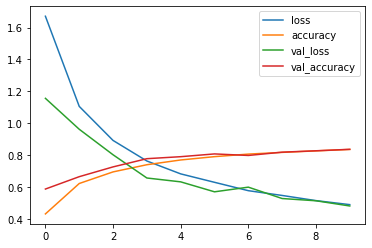

In [6]:
pd.DataFrame(history1.history).plot()


In [7]:
evaluation1 = model.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation1[1]))

344/344 [==============================] - 4s 12ms/step - loss: 0.4797 - accuracy: 0.8355
Test Accuracy: 0.8355454802513123


Normalized confusion matrix
[[0.881 0.016 0.019 0.007 0.016 0.003 0.002 0.003 0.031 0.021 0.001]
 [0.008 0.941 0.    0.    0.002 0.001 0.002 0.    0.002 0.044 0.   ]
 [0.071 0.004 0.656 0.038 0.079 0.073 0.042 0.017 0.008 0.011 0.001]
 [0.022 0.009 0.032 0.609 0.053 0.207 0.025 0.018 0.008 0.015 0.002]
 [0.015 0.002 0.022 0.026 0.853 0.033 0.017 0.026 0.004 0.    0.002]
 [0.008 0.003 0.012 0.065 0.033 0.834 0.009 0.028 0.    0.008 0.   ]
 [0.006 0.004 0.022 0.041 0.037 0.024 0.843 0.006 0.008 0.003 0.006]
 [0.013 0.007 0.011 0.015 0.039 0.053 0.003 0.848 0.003 0.007 0.001]
 [0.072 0.027 0.002 0.007 0.    0.    0.002 0.002 0.877 0.011 0.   ]
 [0.023 0.059 0.001 0.004 0.    0.002 0.    0.003 0.008 0.9   0.   ]
 [0.011 0.002 0.001 0.015 0.007 0.001 0.006 0.002 0.001 0.005 0.949]]


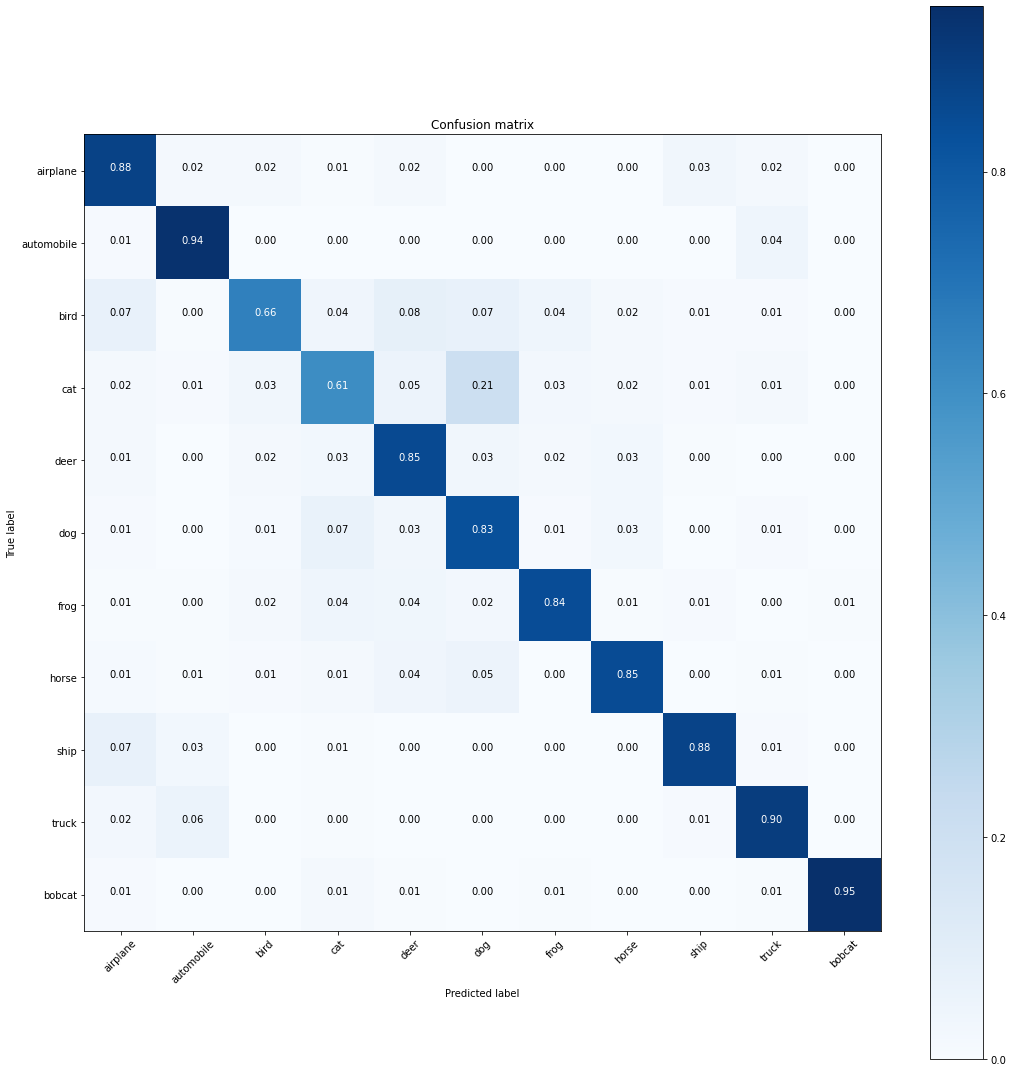

In [8]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plt.figure(figsize=(15,15))
plot_confusion_matrix(cm , ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck','bobcat'],normalize=True)



In [11]:
saved_mod = define_model.saved_mod

(55000, 32, 32, 3)

In [61]:
saved_mod.layers[-4:23]

In [93]:
import keras


# v = 3
# def hi():
#     # other code...
#     hi.layer_1 = []
#     l = [0,1,2,3,4]
#     for i in l:
        
#         hi.bye = 4*l[i] # Create function attribute.
#         hi.layer_1.append(hi.bye)

#         sigh = 10

# hi()
# a = hi.bye
# print(hi.layer_1)

# def mod_loop():
#     model_trans=keras.saved_mod.load_model('C:/Users/sadma/Lab2/model.h5')
#     # lay = [0,2,6,8,12,14,19,22]
#     lay = [0,2]  #just to check 
#     mod_loop.mod_layer = []
#     for i in lay:
#         mod_loop.model_transfered = keras.Model(inputs=model_trans.input, outputs=model_trans.layers[i].output)
#         mod_loop.mod_layer.append(mod_loop.model_transfered)
#         model_tran = keras.Model(inputs=model_trans.input, outputs=model_trans.layers[i:23].output)
    


def run_loop():
    #load data
    x_train, x_test, y_train_cat, y_test_cat, y_test = load_dataset()
    # define model
    model= define_model()  # channge the model eveytime it runs
    
    #fit 
    history=model.fit(x_train,y_train_cat,epochs=10,validation_data=(x_test,y_test_cat))
    
    #plot
    plot_(history)
    
    #eval score
    evaluation = model.evaluate(x_test, y_test_cat)
    print('Test Accuracy: {}'.format(evaluation[1]))
    
    #confusion matrix
    p_test = model.predict(x_test).argmax(axis=1)
    cm = confusion_matrix(y_test, p_test)
    plt.figure(figsize=(15,15))
    plot_confusion_matrix(cm , ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck','bobcat'],normalize=True)


    
    

model_trans=keras.saved_mod.load_model('C:/Users/sadma/Lab2/model.h5')
# lay = [0,2,6,8,12,14,19,22]
lay = [0,2]  #just to check 



for i in lay:
    model_transfered = keras.Model(inputs=model_trans.input, outputs=model_trans.layers[i].output)
    model_tran = keras.Model(inputs=model_trans.input, outputs=model_trans.layers[i:23].output)
    model_tran.summary()
    model_transfered.summary()
#     for layer in model_transfered.layers:
#         layer.trainable = False
#         new_model = Sequential()
#         new_model.add(model_transfered)
#         new_model.add(model_tran)
         
#         new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#         for j in range(1):
#             print('FOR LAYER: {}'.format(lay[j]))
            
            

#             history=new_model.fit(x_train,y_train_cat,epochs=50,validation_data=(x_test,y_test_cat))
#             pd.DataFrame(history.history).plot()
#             evaluation = new_model.evaluate(x_test, y_test_cat)
#             print('Test Accuracy: {}'.format(evaluation[1]))
#             p_test = new_model.predict(x_test).argmax(axis=1)
#             cm = confusion_matrix(y_test, p_test)
#             plt.figure(figsize=(15,15))
#             plot_confusion_matrix(cm , ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck','bobcat'],normalize=True)




Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_95 (Functional)       (None, 32, 32, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_95 (Functional)       (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
Total params: 1,024
Trainable params: 960
Non-trainable params: 64
_______________________________